# Visualizing Time Series in Python

* Time series are a fundamental way to store and analyze many types of data
* Financial, weather, and device data area all best handled as time series

#### Matplotlib
* **For a list of available matplotlib styles: `print(plt.style.available)`**
    * `plt.style.use('fivethirtyeight')`
    * `ggplot`
    * "financial times"(?)
* `df.set_index('column_name')`

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('fivethirtyeight')
plt.show()

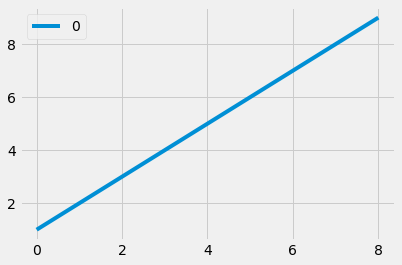

In [9]:
plt.style.use('fivethirtyeight')

plt.show()
df=pd.DataFrame([1,2,3,4,5,6,7,8,9])
df.plot()
plt.show()

* `ax = df.plot(color='blue', figsize=(12,5), fontsize=12, linewidth=3, linestyle='--')`
* `ax.set_xlabel('Date')`
* `ax.set_ylabel('The values of my y-axis', fontsize=16)`
* `ax.set_title('The title of my plot', fontsize = 16)`
* `plt.show()`

* figsize = (length, width)

#### Customize your time series plot
* Plots allow users/viewers to better understand the data
* However, you may sometimes want to highlight specific events or guide the user through your train of thought

#### Adding markers
* **`axvline`**
* **`axhline`**

* `ax.axvline(x='1969-01-01', color='red', linestyle='--')`
* `ax.axhline(y=100, color='green', linestyle='--')`

#### Highlight regions of your graph
* in order to add a shaded region to a specific area of your plot
* `ax.axvspan`
* `ax.axhspan`
* `ax.axvspan('1964-01-01', '1968-01-01', color='red', alpha=0.5)`
* `ax.axhspan(8,6, color='green', alpha=0.2)`

#### Clean your time series data
* Important to perform some investigatory analysis of your data before proceeding to more sophisticated tasks
* `df.isnull()` vs `df.notnull()`

#### Replacing missing values in a dataframe
* `df = df.fillna(method='bfill')`
* `ffill`
* `np.mean()`

#### Plot aggregates of your data
* **Moving averages** aka **rolling means** is a commonly used technique if the field of time series analysis for many purposes:
    * smoothing out short-term fluctuations
    * removing outliers 
    * highlighting long-term trends or outliers 
    * in pandas, the `.rolling()` method allows you to specify the number of data points to use when computing your metrics
* Here, (below) specify a sliding window of 52 points:

```
co2_levels_mean = co2_levels.rolling(window=52).mean()

ax = co2_levels_mean.plot()
ax.set_xlabel('Date')
ax.set_ylabel("The values of my Y axis")
ax.set_title("52 weeks rolling mean of my time series")

plt.show()
```
* The parameter of the window size of the rolling mean is usually set through trial and error, or according to some seasonality

* **Computing aggregate values of your time series**
    * When index is DateTimeIndex... `print(co2_levels.index.month)`

### Plot aggregates of your data

#### Moving averages (aka rolling mean)
* **`df_mean = df.rolling(window=12).mean()`**
* A moving average could be used for many different purposes:
    * Smoothing out short term fluctuations
    * removing outliers
    * highlighting long-term trends or cycles
* `co2_levels_mean = co2_levels.rolling(window=52).mean()`

#### Computing aggregate values of your time series

```
index_month = co2_levels.index.month
co2_levels_by_month = co2_levels.groupby(index_month).mean()
co2_levels_by_month.plot()
plt.show()
```

#### Computing rolling mean with upper and lower stds of 2:

```
# Compute the 52 weeks rolling mean of the co2_levels DataFrame
ma = co2_levels.rolling(window=52).mean()

# Compute the 52 weeks rolling standard deviation of the co2_levels DataFrame
mstd = co2_levels.rolling(window=52).std()

# Add the upper bound column to the ma DataFrame
ma['upper'] = ma['co2'] + (mstd['co2'] * 2)

# Add the lower bound column to the ma DataFrame
ma['lower'] = ma['co2'] - (mstd['co2'] * 2)

# Plot the content of the ma DataFrame
ax = ma.plot(linewidth=0.8, fontsize=6)

# Specify labels, legend, and show the plot
ax.set_xlabel('Date', fontsize=10)
ax.set_ylabel('CO2 levels in Mauai Hawaii', fontsize=10)
ax.set_title('Rolling mean and variance of CO2 levels\nin Mauai Hawaii from 1958 to 2001', fontsize=10)
plt.show()
```

#### Summarizing the values in your time series data
* It is critical to collect summary statistics of any time series that you are working with 
* **Histograms:**
    * `ax2 = df.plot(kind='hist', bins=10)`
* **Kernel Density plots:**
    * A variation of histograms
    * They use kernel smoothing to plot the values of your data and allow for smoother distributions by dampening the effect of noise and outliers, all while displayiing where the mass of your data is located.
    * `ax3 = df.plot(kind='density', linewidth=2)`